In [1]:
import numpy as np
import soundfile as sf
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import Audio
from librosa.feature import melspectrogram
from librosa.display import specshow
import librosa
import scipy

In [9]:
sp01, sr = sf.read('../data/audio/clean/sp01.wav')
sp01_station_sn10, sr = sf.read('../data/audio/station_10dB/sp01_station_sn10.wav')
print(sp01.shape)
print(sr)

(22529,)
8000


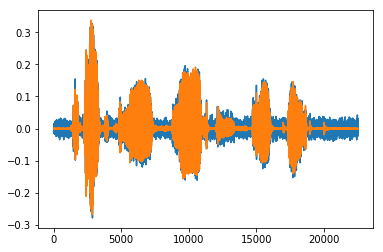

In [3]:
plt.plot(sp01_station_sn10)
plt.plot(sp01)

In [4]:
Audio(sp01,rate=sr)

In [5]:
Audio(sp01_station_sn10,rate=sr)

(129, 175)

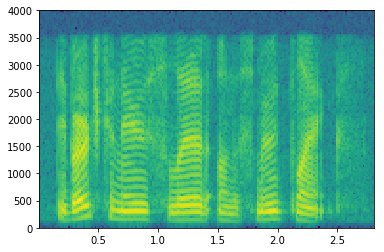

In [139]:
Pxx, freqs, bins, im = plt.specgram(sp01, NFFT=256, Fs=sr, noverlap=128)
Pxx.shape

(129, 178)


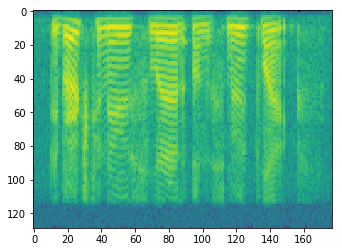

In [7]:
freqs, bins, Sxx = scipy.signal.stft(sp01, nfft=256, fs=sr, noverlap=128)
print(Sxx.shape)
plt.imshow(np.log(np.abs(Sxx[:,:-1])))

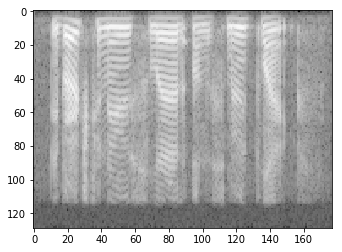

In [140]:
freqs, bins, Sxx = scipy.signal.stft(sp01, nfft=256, fs=sr, noverlap=128)
plt.imshow(np.log(np.abs(Sxx[:,:-1])), cmap='gray')
t, x = scipy.signal.istft(np.abs(Sxx) * np.exp(1j* np.angle(Sxx)), fs=sr, nfft=256, noverlap=128)
Audio(x, rate=sr)

0.00366342219987 -0.00519779821529


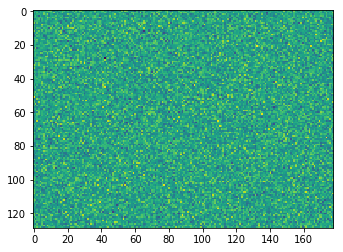

In [142]:
noise = np.random.normal(size=Sxx.shape) / 1000
print(noise.max(), noise.min())
plt.imshow(noise)

0.065939076346


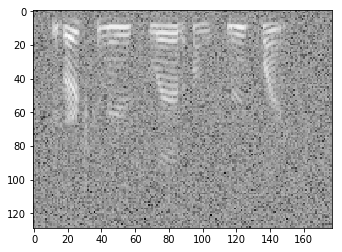

In [143]:
freqs, bins, Sxx = scipy.signal.stft(sp01, nfft=256, fs=sr, noverlap=128)
angle = np.angle(Sxx)
Sxx = np.abs(Sxx + noise)
print(Sxx.max())
plt.imshow(np.log(Sxx[:,:-1]), cmap='gray')
t, x = scipy.signal.istft(Sxx * np.exp(1j * angle), fs=sr, nfft=256, noverlap=128)
Audio(x, rate=sr)

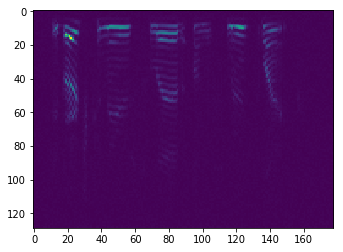

In [102]:
plt.imshow(Sxx / Sxx.max())

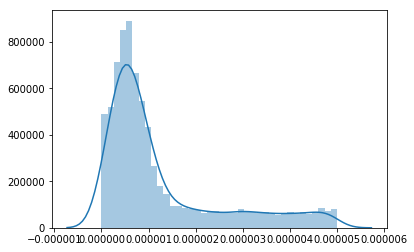

In [88]:
import seaborn as sns
freqs, bins, Sxx = scipy.signal.stft(sp01, nfft=256, fs=sr, noverlap=128)
sxx = np.abs(Sxx).flatten()
sns.distplot(sxx[sxx < 0.000005])

In [131]:
book, sr = sf.read('data/book.wav')
freqs, bins, Sxx = scipy.signal.stft(book, nfft=256, fs=sr, noverlap=128)
t, x = scipy.signal.istft(np.abs(Sxx) * np.exp(1j* np.angle(Sxx)), fs=sr, nfft=256, noverlap=128)
Audio(x, rate=sr)

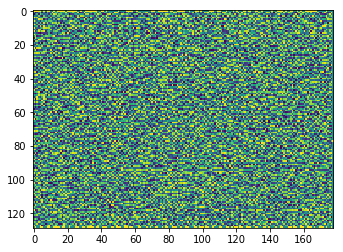

In [117]:
freqs, bins, Sxx = scipy.signal.stft(sp01_station_sn10, nfft=256, fs=sr, noverlap=128)
plt.imshow(np.abs(Sxx[::-1]))
plt.imshow(np.angle(Sxx[::-1]))

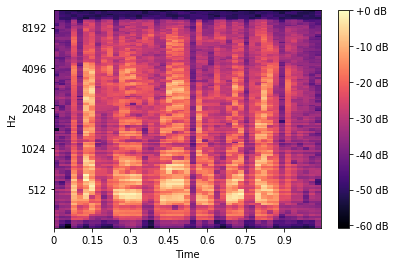

In [74]:
s = melspectrogram(sp01, sr=sr, n_fft=256, power=1)
specshow(librosa.power_to_db(s, ref=np.max), y_axis='mel',x_axis='time')
plt.colorbar(format='%+2.0f dB')

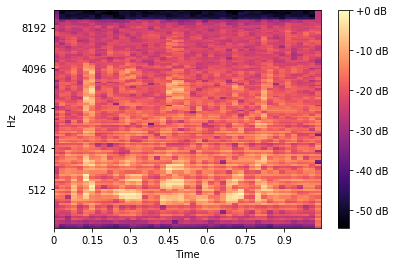

In [76]:
s = melspectrogram(sp01_station_sn10, sr=sr, n_fft=256, power=1)
specshow(librosa.power_to_db(s, ref=np.max), y_axis='mel',x_axis='time')
plt.colorbar(format='%+2.0f dB')

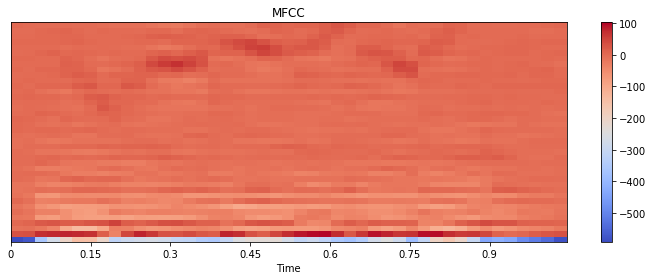

In [79]:
mfccs = librosa.feature.mfcc(y=sp01, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

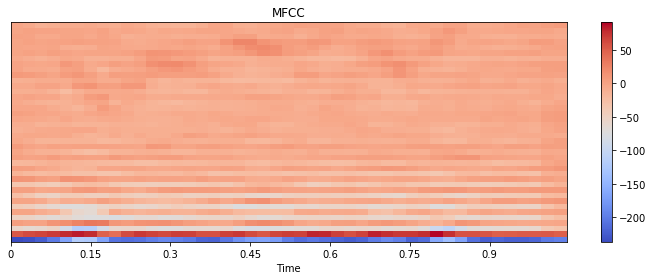

In [80]:
mfccs = librosa.feature.mfcc(y=sp01_station_sn10, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()